In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from textblob import TextBlob
from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import plot_importance
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls


In [3]:
df_2017=pd.read_csv('../data/datasets_top50-2017.csv')
df_2018=pd.read_csv('../data/datasets_top50-2018.csv')
df_2019=pd.read_csv('../data/datasets_top50-2019.csv',encoding='latin-1')


In [4]:
def data_properties(year):
    print("properties for year are as follows :\n")
    print("column details:\n")
    print(year.columns)
    print("shape:\n")
    print(year.shape)
    print("info about dataset:\n")
    print(year.info())
    print("\n")


In [5]:
data_properties(df_2017)
#data_properties(df_2018)
data_properties(df_2019)

properties for year are as follows :

column details:

Index(['id', 'name', 'artists', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')
shape:

(100, 16)
info about dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                100 non-null    object 
 1   name              100 non-null    object 
 2   artists           100 non-null    object 
 3   danceability      100 non-null    float64
 4   energy            100 non-null    float64
 5   key               100 non-null    float64
 6   loudness          100 non-null    float64
 7   mode              100 non-null    float64
 8   speechiness       100 non-null    float64
 9   acousticness      100 non-null    float64


### as we can see2019 data is kind of different so we need to change the columsn name aililar to 2017 and 2018 data .... 
### will do it later

In [6]:
def checkfornull(year):
    print("cheking for null values......")
    print(year.columns[year.isnull().any()])
    output=year.isnull().sum()
    return output 

In [7]:
checkfornull(df_2018)

cheking for null values......
Index([], dtype='object')


id                  0
name                0
artists             0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

In [8]:
# in the data we obsrve that all the data is not in float .So , in order to maintain a symetry,we will 
# convert the non float data to float data type

def float_conversion(column,value):
    column= pd.to_numeric(value, downcast="float")
    return column


In [9]:
float_conversion(df_2018.mode,df_2018["mode"])
float_conversion(df_2018.duration_ms,df_2018["duration_ms"])
float_conversion(df_2018.time_signature,df_2018["time_signature"])

df_2018.head()


,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.552,0.357,77.169,198973.0,4.0
1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.123,0.473,75.023,166606.0,4.0
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.131,0.140,159.847,218147.0,4.0
3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8.0,-8.011,1.0,0.1170,0.5800,0.000000,0.112,0.439,140.124,221440.0,4.0
4,2G7V7zsVDxg1yRsu7Ew9R,In My Feelings,Drake,0.835,0.626,1.0,-5.833,1.0,0.1250,0.0589,0.000060,0.396,0.350,91.030,217925.0,4.0


In [10]:
#lets analyse  each  columns sequentially for better understanding of the data

In [11]:
def understand_feature(feature):
    return feature.describe()


In [12]:
#The higher the value, the easier it is to dance to this song.
print("overall danceability feature\n")
understand_feature(df_2018["danceability"])


overall danceability feature



count    100.00000
mean       0.71646
std        0.13107
min        0.25800
25%        0.63550
50%        0.73300
75%        0.79825
max        0.96400
Name: danceability, dtype: float64

In [13]:
print("top 10  danceability feature\n")
understand_feature(df_2018["danceability"].head(10))



top 10  danceability feature



count    10.000000
mean      0.740400
std       0.086164
min       0.587000
25%       0.694750
50%       0.747000
75%       0.809750
max       0.836000
Name: danceability, dtype: float64

In [14]:
#sorting out more danceble songs 
df_2018['dancebility_new']=df_2018['danceability']
df_2018.loc[df_2018['danceability']>=0.6000,'dancebility_new']='1'
df_2018.loc[(df_2018['danceability']<0.6000),'dancebility_new']='0'

print(df_2018['dancebility_new'].value_counts())

1    82
0    18
Name: dancebility_new, dtype: int64


In [15]:
print("top 10  energy  feature\n")
understand_feature(df_2018["energy"].head(10))

top 10  energy  feature



count    10.000000
mean      0.635700
std       0.143074
min       0.449000
25%       0.547750
50%       0.588000
75%       0.701000
max       0.880000
Name: energy, dtype: float64

In [16]:
#understanding beats per minute i.e tempo of the song
#here we do classification of the tempo on the bases of beats per min 
#REf:https://www.musical-u.com/learn/rhythm-tips-for-identifying-music-genres-by-ear/
df_2018['tempo_rate']=df_2018['tempo']


In [17]:
df_2018.loc[df_2018['tempo']<65,'tempo_rate']='very slow'
df_2018.loc[(df_2018['tempo']>=66) & (df_2018['tempo']<=76),'tempo_rate']='slow'
df_2018.loc[(df_2018['tempo']>=77) & (df_2018['tempo']<=108),'tempo_rate']='moderate'
df_2018.loc[(df_2018['tempo']>=109) & (df_2018['tempo']<=168),'tempo_rate']='fast'
df_2018.loc[df_2018['tempo']>168,'tempo_rate']='very fast'


In [18]:
print("Tempo Rate\tCount\n")
print(df_2018['tempo_rate'].value_counts())
print("\n")
df_2018.head()

Tempo Rate	Count

fast         47
moderate     44
very fast     7
very slow     1
slow          1
Name: tempo_rate, dtype: int64




,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,dancebility_new,tempo_rate
0,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.552,0.357,77.169,198973.0,4.0,1,moderate
1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.123,0.473,75.023,166606.0,4.0,1,slow
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.131,0.140,159.847,218147.0,4.0,0,fast
3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8.0,-8.011,1.0,0.1170,0.5800,0.000000,0.112,0.439,140.124,221440.0,4.0,1,fast
4,2G7V7zsVDxg1yRsu7Ew9R,In My Feelings,Drake,0.835,0.626,1.0,-5.833,1.0,0.1250,0.0589,0.000060,0.396,0.350,91.030,217925.0,4.0,1,moderate


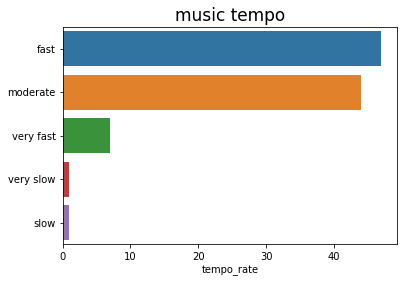

In [20]:
sns.barplot(x=pd.DataFrame(df_2018['tempo_rate'].value_counts()).tempo_rate, 
            y=pd.DataFrame(df_2018['tempo_rate'].value_counts()).index
           )
plt.title('music tempo', fontsize=17);

sort the songs on the bases of important parametes like :

In [21]:
df_2018[['name','artists','danceability','valence','tempo','tempo_rate','energy']].sort_values(by=["danceability","energy","valence"],ascending=False).head(10)

,name,artists,danceability,valence,tempo,tempo_rate,energy
91,Yes Indeed,Lil Baby,0.964,0.562,119.958,fast,0.346
55,FEFE (feat. Nicki Minaj & Murda Beatz),6ix9ine,0.931,0.376,125.978,fast,0.387
19,Look Alive (feat. Drake),BlocBoy JB,0.922,0.595,140.022,fast,0.581
18,Moonlight,XXXTENTACION,0.921,0.711,128.009,fast,0.537
61,Nonstop,Drake,0.912,0.422,154.983,fast,0.412
73,Walk It Talk It,Migos,0.909,0.406,145.905,fast,0.628
89,Bella,Wolfine,0.909,0.844,94.016,moderate,0.493
82,HUMBLE.,Kendrick Lamar,0.908,0.421,150.011,fast,0.621
21,Te Bot? - Remix,Nio Garcia,0.903,0.442,96.507,moderate,0.675
30,Taste (feat. Offset),Tyga,0.884,0.342,97.994,moderate,0.559


as we can see that these features collectively couldn't generate the sorted manner of artist as expected.We need to change our approach and include more features 
### Analysing top artists
Analysing Top artists will give us a better idea about the feature importance 

In [22]:
#count the value:in terms on songs per year for an  artist
print("Artist\t\tSongs\n")
print(df_2018["artists"].value_counts().head(20))

Artist		Songs

XXXTENTACION       6
Post Malone        6
Drake              4
Marshmello         3
Ed Sheeran         3
Kendrick Lamar     2
Khalid             2
Selena Gomez       2
Ariana Grande      2
Imagine Dragons    2
Clean Bandit       2
Calvin Harris      2
Migos              2
Ozuna              2
Maroon 5           2
The Weeknd         2
Camila Cabello     2
Dua Lipa           2
Reik               1
Maluma             1
Name: artists, dtype: int64


#### comparing  the  top artists based on our features 
lets start with top 5:

- Post Malone         6
- XXXTENTACION        6
- Drake               4
- Ed Sheeran          3
- Marshmello          3

In [23]:
PostMalone=df_2018[df_2018['artists']=='Post Malone']
print("Post Malone:")
PostMalone[['name','danceability','energy','loudness','valence','tempo','tempo_rate']]



Post Malone:


,name,danceability,energy,loudness,valence,tempo,tempo_rate
2,rockstar (feat. 21 Savage),0.587,0.535,-6.090,0.140,159.847,fast
3,Psycho (feat. Ty Dolla $ign),0.739,0.559,-8.011,0.439,140.124,fast
5,Better Now,0.680,0.563,-5.843,0.374,145.028,fast
32,I Fall Apart,0.556,0.538,-5.408,0.291,143.950,fast
75,Candy Paint,0.670,0.654,-5.944,0.438,180.024,very fast
76,Congratulations,0.630,0.804,-4.183,0.492,123.146,fast


In [24]:
XXXTENTACION = df_2018[df_2018['artists']=='XXXTENTACION']
print("XXXTENTACION:")
XXXTENTACION[['name','danceability','energy','loudness','valence','tempo','tempo_rate']]

XXXTENTACION:


,name,danceability,energy,loudness,valence,tempo,tempo_rate
1,SAD!,0.740,0.613,-4.880,0.473,75.023,slow
18,Moonlight,0.921,0.537,-5.723,0.711,128.009,fast
28,Jocelyn Flores,0.872,0.391,-9.144,0.437,134.021,fast
38,changes,0.669,0.308,-10.068,0.520,64.934,very slow
62,Fuck Love (feat. Trippie Redd),0.797,0.533,-9.740,0.329,131.036,fast
94,Everybody Dies In Their Nightmares,0.734,0.570,-7.066,0.689,129.953,fast


In [25]:
Drake=df_2018[df_2018['artists']=='Drake']
print("Drake:")
Drake[['name','danceability','energy','loudness','valence','tempo','tempo_rate']]

Drake:


,name,danceability,energy,loudness,valence,tempo,tempo_rate
0,God's Plan,0.754,0.449,-9.211,0.357,77.169,moderate
4,In My Feelings,0.835,0.626,-5.833,0.350,91.030,moderate
12,Nice For What,0.586,0.909,-6.474,0.757,93.394,moderate
61,Nonstop,0.912,0.412,-8.074,0.422,154.983,fast


In [26]:
EdSheeran  =df_2018[df_2018['artists']=='Ed Sheeran']
print("Ed Sheeran  :")
EdSheeran  [['name','danceability','energy','loudness','valence','tempo','tempo_rate']]

Ed Sheeran  :


,name,danceability,energy,loudness,valence,tempo,tempo_rate
25,Shape of You,0.825,0.652,-3.183,0.931,95.977,moderate
29,Perfect,0.599,0.448,-6.312,0.168,95.050,moderate
84,Perfect Duet (Ed Sheeran & Beyonc?),0.587,0.299,-7.365,0.356,94.992,moderate


In [27]:
Marshmello  =df_2018[df_2018['artists']=='Marshmello']
print("Marshmello   :")
Marshmello  [['name','danceability','energy','loudness','valence','tempo','tempo_rate']]

Marshmello   :


,name,danceability,energy,loudness,valence,tempo,tempo_rate
9,FRIENDS,0.626,0.880,-2.384,0.534,95.079,moderate
51,Happier,0.687,0.792,-2.749,0.671,100.015,moderate
64,Silence,0.520,0.761,-3.093,0.286,141.971,fast


## Here's the observation for the above  top 5 results:
- dancebility:Range:0.49-->0.90+
- energy:Range:0.48-->0.90+ , in general, the enegy in not very significant but  top songs have energy more than 0.48
- loudness:more -ve loudness means more popular the song is 
- valence:Range:Not a very important criteria
- tempo:Range:can not conclude about this, need more EDA
- tempo rate:Range: fast and moderate are in top



In [28]:

feture_to_plot = ["energy", "liveness", "tempo", "valence", "loudness", "speechiness", "acousticness", "danceability", "instrumentalness"]
text1 = df_2018["artists"] + " - " + df_2018["name"]
text2 = text1.values
X = df_2018[feture_to_plot].values
y = df_2018["danceability"].values
min_maxscaler = MinMaxScaler()
X = min_maxscaler.fit_transform(X)
pca = PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

plot3d = go.Scatter3d(
    x=X[:,0],
    y=X[:,1],
    z=X[:,2],
    text=text2,
    mode="markers",
    marker=dict(
        size=8,
        color=y
    )
)

fig = go.Figure(data=[plot3d])
py.iplot(fig, filename="3d graph")


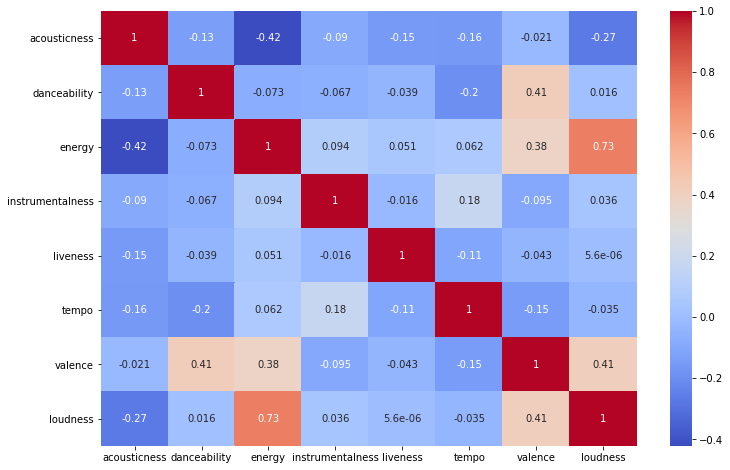

In [29]:
correlation = df_2018[['acousticness','danceability','energy','instrumentalness','liveness','tempo','valence',
                       'loudness']]
plt.figure(figsize=(12,8))
sns.heatmap(correlation.corr(), annot=True,cmap="coolwarm");

##### We can observe that there is a correlation between the loudness and the perceived energy of the song. The jointplots indicate a correlation between these two. Lets understand  how much one feature si impacted by another feature 

In [30]:
def create_joinplot(val1,val2,year,colr):
    sns.jointplot(val1,val2, data=year,kind='reg',color=colr)

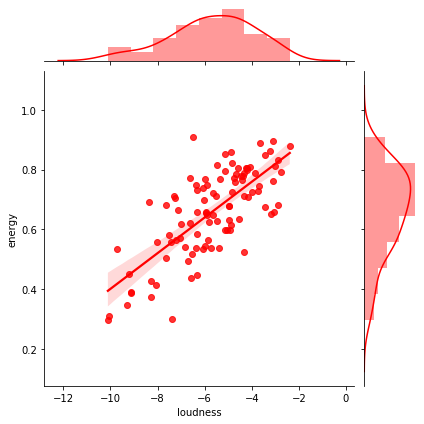

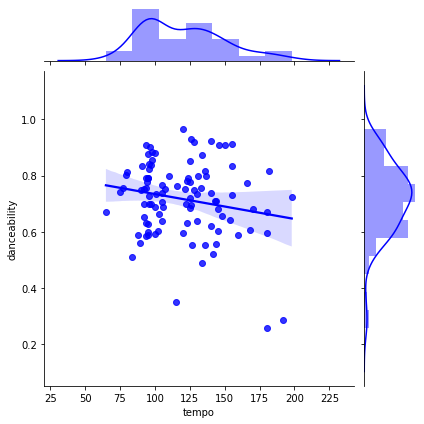

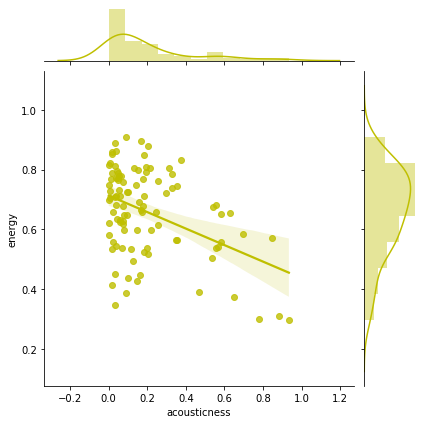

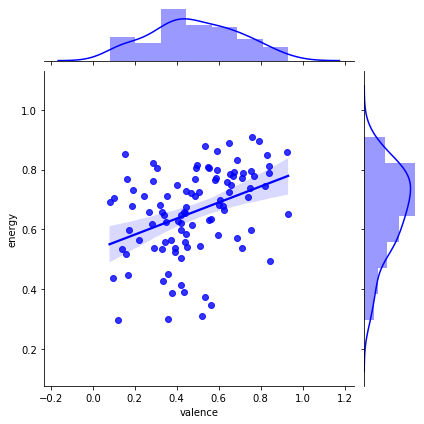

In [31]:

create_joinplot('loudness','energy',df_2018,'r')
create_joinplot('tempo','danceability',df_2018,'b')
create_joinplot('acousticness','energy',df_2018,'y')
create_joinplot('valence','energy',df_2018,'b')

### from the corelation matrix we observe that  
- there is a relation between  tempo and dancebility 
- there is a relation between  acounsticeness and energy 
- there is a relation between  tempo and acousticeness
- there is a relation between  energy and loudness
- there is a relation between  tempo and valence
- there is a relation between  valence and dancebility 
- there is a relation between  valence and energy  

#### understand these correlation features in more details ;


In [32]:
def feature_details(feature):
    print("Mean value ", feature.mean())
    sns.distplot(feature,color="r")
    plt.show()


Mean value  0.7164600000000001


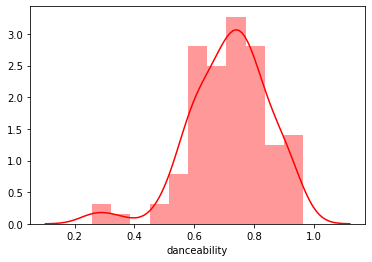

In [33]:
feature_details(df_2018['danceability'])

*Conclusion*: top songs have high dancebility.And people listen to those songs in which they can dance.

Mean value  0.6590600000000001


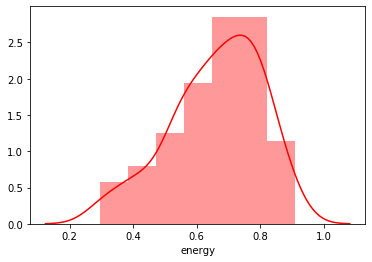

In [34]:
feature_details(df_2018['energy'])

*Conclusion*:people like energetic songs 

Mean value  -5.677639999999999


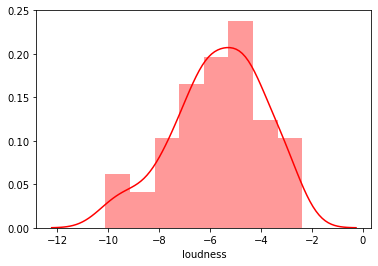

In [35]:
feature_details(df_2018['loudness'])

*Conclusion*: more noice means more ranking 

Mean value  0.19570132


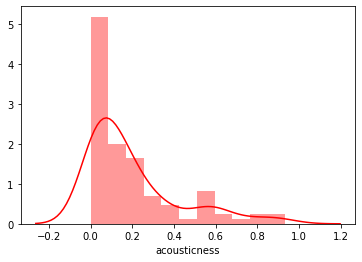

In [36]:
feature_details(df_2018['acousticness'])

*Conclusion*:people don't lisen more to the acoustics 

Mean value  0.48444300000000007


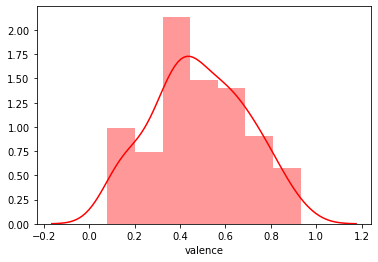

In [37]:
feature_details(df_2018['valence'])

*Conclusion*:songs are evenly distributed and totally depends upon the mood 

Mean value  119.90417999999998


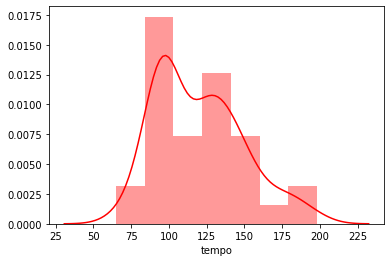

In [38]:
feature_details(df_2018['tempo'])

*Conclusion*:people listen fast songs more 

### Again construct a 3d graph  with out limited features for better understanding 

In [39]:

feture_to_plot = ["energy", "liveness", "tempo", "valence","danceability"]
text1 = df_2018["artists"] + " - " + df_2018["name"]
text2 = text1.values
X = df_2018[feture_to_plot].values
y = df_2018["danceability"].values
min_maxscaler = MinMaxScaler()
X = min_maxscaler.fit_transform(X)
pca = PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

plot3d = go.Scatter3d(
    x=X[:,0],
    y=X[:,1],
    z=X[:,2],
    text=text2,
    mode="markers",
    marker=dict(
        size=8,
        color=y
    )
)

fig = go.Figure(data=[plot3d])
py.iplot(fig, filename="3d graph-2nd")


 ### create a popularity column depending on our matrices

In [41]:
df_2018["popularity"]=""
df_2018.loc[(df_2018['danceability']>=0.69) | (df_2018['energy']>=0.66)| (df_2018['loudness']>=-5.6)| (df_2018['acousticness']>=0.16)| 
            (df_2018['valence']>=0.51)| (df_2018['tempo']>=119.0),'popularity']='1'
df_2018.loc[(df_2018['danceability']<0.69) & (df_2018['energy']<0.66) & (df_2018['loudness']<-5.6),'popularity']='0'
df_2018.head()

df_2018.to_csv("./data/df_2017_new.csv",index=False)

FileNotFoundError: [Errno 2] No such file or directory: './data/df_2017_new.csv'

In [43]:
df_2018.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,dancebility_new,tempo_rate,popularity
0,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.552,0.357,77.169,198973.0,4.0,1,moderate,1
1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.123,0.473,75.023,166606.0,4.0,1,slow,1
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.131,0.140,159.847,218147.0,4.0,0,fast,0
3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8.0,-8.011,1.0,0.1170,0.5800,0.000000,0.112,0.439,140.124,221440.0,4.0,1,fast,1
4,2G7V7zsVDxg1yRsu7Ew9R,In My Feelings,Drake,0.835,0.626,1.0,-5.833,1.0,0.1250,0.0589,0.000060,0.396,0.350,91.030,217925.0,4.0,1,moderate,1


In [42]:
df_2018_new=pd.read_csv('./data/df_2018_new.csv')


FileNotFoundError: [Errno 2] File ./data/df_2018_new.csv does not exist: './data/df_2018_new.csv'

## corelation between features and popularity

In [43]:
def draw(year,compare_col,color):
    graph = sns.FacetGrid(df_2018_new, col = "popularity")
    graph.map(sns.distplot, compare_col, bins = 25,color=color)
    return plt.show()

In [44]:
draw(df_2018_new,"danceability","b")
draw(df_2018_new,"acousticness","r")
draw(df_2018_new,"loudness","m")
draw(df_2018_new,"valence","r")
draw(df_2018_new,"tempo","y")


NameError: name 'df_2018_new' is not defined

In [ ]:
popularity_data = pd.concat([df_2018_new["name"],df_2018_new["popularity"]],axis=1)
popularity_data.head()

In [ ]:
df_2018_final=df_2018.copy()
df_2018_final.drop(["id","name","artists","tempo_rate","dancebility_new"],axis=1,inplace=True)
df_2018_final.columns


In [ ]:
df_2018_final["key"] = df_2018_final["key"].astype("category")
df_2018_final = pd.get_dummies(df_2018_final, columns=["key"])
df_2018_final.head()

In [ ]:
df_2018_final["time_signature"] = df_2018_final["time_signature"].astype("category")
df_2018_final = pd.get_dummies(df_2018_final, columns=["time_signature"])
df_2018_final.head()

In [ ]:
def change_datatype(var):
    df_2018_final[var] = df_2018_final[var].astype(int)
    
columns= ["key_0.0","key_1.0","key_2.0",
         "key_3.0","key_4.0","key_5.0","key_6.0","key_7.0","key_8.0","key_9.0","key_10.0","key_11.0","time_signature_3.0","time_signature_4.0"]
for column in columns:
    change_datatype(column)
    

In [ ]:
def load_data():
    
    y = df_2018_final["popularity"].values
    X = df_2018_final.drop(["popularity"],axis=1)
    return X,y
X,y =load_data()

feature_cols = X.columns.to_list()

#### There is not a great  linear correlations in our data So, Decision Tree algorithms will give  better results as compared to linear regression models. Therfore using  Random Forest 
 

In [ ]:

#x_data=X
X,y = load_data()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.6)
# X_train = X_train.T
# X_test = X_test.T
X_train=X_train[:None]
X_test=X_test[:None]
y_train = y_train.astype(int).T
y_test = y_test.astype(int).T
print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)


In [ ]:
def plot_impfeature():
    xgb = XGBClassifier()
    xgb.fit(X_train, y_train)
    ax = plot_importance(xgb,color="r", height=0.15,
                         title='  Features Importance ', xlabel='Feature score', ylabel='Features',
                         importance_type='weight'
                        )

    return pyplot.show()


plot_impfeature()

##### The above graph assure that :
-  Our proposed ranked features turned out to be  most important for this data  
-  Example: we calculated features like :dancebility ,energy,loudness ets of most importance.And hence thus turned out true.

In [ ]:
rf=RandomForestClassifier(random_state = 3)
rf.fit(X_train,y_train)

print("Train accuracy ",rf.score(X_train,y_train))
print("Test accuracy ",rf.score(X_test,y_test))

RandomForestClassifier_score=rf.score(X_test,y_test)
y_pred=rf.predict(X_test)
t_true=y_test